## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 23:59** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [54]:
data = pd.read_csv('./diabetes.csv')

In [55]:
if ~data.isnull().any().any():
    print('Пропусков в данных нет')
else:
    print('В данных присутствуют пропуски')

Пропусков в данных нет


In [56]:
# Данные
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [57]:
# Счёт и вывод нулей
for i in data.columns:
    print('Столбец {} содержит {} нулевых значений'.format(i, data[i][data[i] == 0].count()))

Столбец Pregnancies содержит 111 нулевых значений
Столбец Glucose содержит 5 нулевых значений
Столбец BloodPressure содержит 35 нулевых значений
Столбец SkinThickness содержит 227 нулевых значений
Столбец Insulin содержит 374 нулевых значений
Столбец BMI содержит 11 нулевых значений
Столбец DiabetesPedigreeFunction содержит 0 нулевых значений
Столбец Age содержит 0 нулевых значений
Столбец Outcome содержит 500 нулевых значений


In [58]:
# Заполнение
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    mean = data[i][data[i] != 0].mean(skipna=True)
    print('Среднее значение столбца {} = {:.2f}'.format(i, mean))
    data[i][data[i] == 0] = mean

Среднее значение столбца Glucose = 121.69
Среднее значение столбца BloodPressure = 72.41
Среднее значение столбца SkinThickness = 29.15
Среднее значение столбца Insulin = 155.55
Среднее значение столбца BMI = 32.46


c:\users\nikir\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\nikir\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\nikir\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ""

* На мой взгляд, в столбце Pregnancies (кол-во беременностей) нули означают не пропущенные значения, а отстутствие беременностей.

* С другой стороны, остальные столбцы, такие как: Glucose (глюкоза в крови), BloodPressure (кровяное давление), SkinThickness (толщина кожи), Insulin (инсулин), BMI (индекс массы тела), DiabetesPedigreeFunction ("синтез истории сахарного диабета у родственников и генетических отношений этих родственников с субъектом") необходимо было заполнить средними значениями, поскольку они содержат пропуски значений в качестве нулевых элементов. Например, индекс массы тела не может быть нулевым, как и остальные показатели.

In [59]:
# Остались ли нули? Повлияло ли на средние? - нет.
for i in data.columns:
    print('Столбец {} содержит {} нулевых значений, среднее - {:.2f}'.format(i, data[i][data[i] == 0].count(), data[i].mean()))

Столбец Pregnancies содержит 111 нулевых значений, среднее - 3.85
Столбец Glucose содержит 0 нулевых значений, среднее - 121.69
Столбец BloodPressure содержит 0 нулевых значений, среднее - 72.41
Столбец SkinThickness содержит 0 нулевых значений, среднее - 29.15
Столбец Insulin содержит 0 нулевых значений, среднее - 155.55
Столбец BMI содержит 0 нулевых значений, среднее - 32.46
Столбец DiabetesPedigreeFunction содержит 0 нулевых значений, среднее - 0.47
Столбец Age содержит 0 нулевых значений, среднее - 33.24
Столбец Outcome содержит 500 нулевых значений, среднее - 0.35


**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

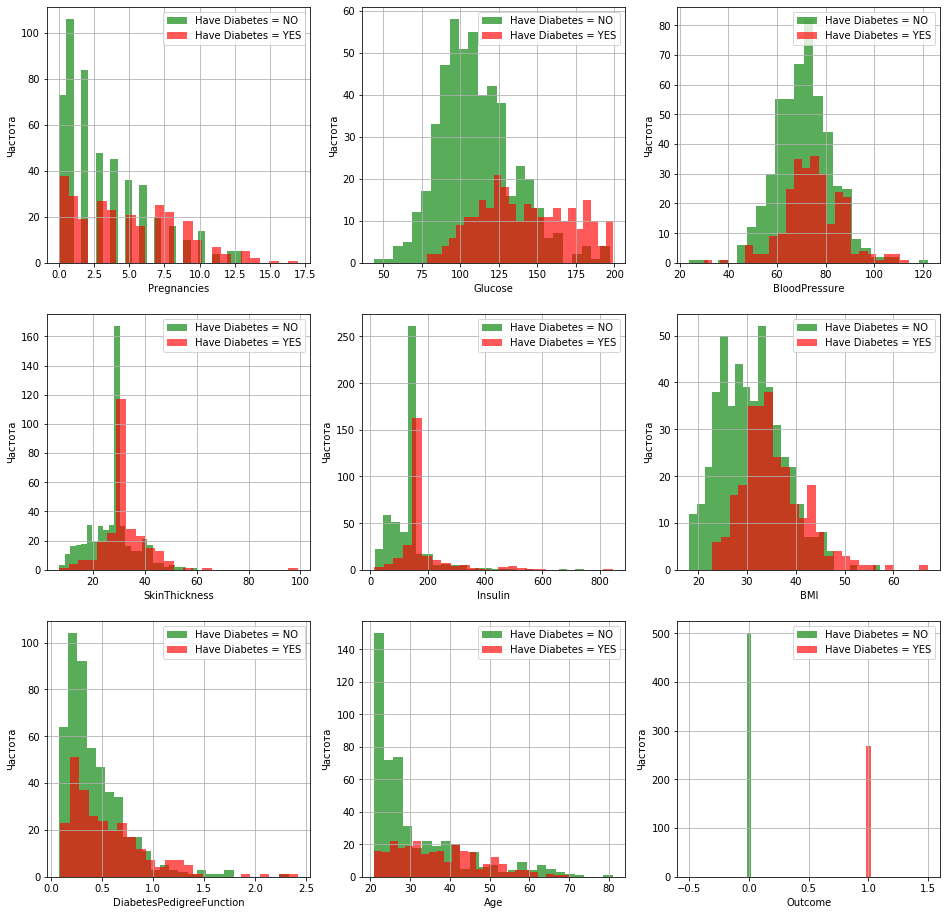

In [60]:
# Построение графиков
fig, ax = plt.subplots(3, 3, figsize=(16, 16))

for col, i in zip(data.columns,
                  [(j, i) for j in range(ax.shape[1])
                   for i in range(ax.shape[0])]):
    for color, label, outcome in zip(['g', 'r'], ['NO', 'YES'], [0, 1]):
        ax[i].grid(True)
        ax[i].hist(data[data['Outcome'] == outcome][col],
                   bins = 25, color=color, alpha=0.65,
                   label='Have Diabetes = %s' % label)
        ax[i].legend()
        ax[i].set_xlabel(col)
        ax[i].set_ylabel('Частота')

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [62]:
# Рандом
rnd_state = 13

In [63]:
# Делим данные
X = data.drop('Outcome', axis = 1)
y = data['Outcome']
del data # Чистим память

# Train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state)

In [64]:
# Метрики
def metrics(predict, real, name = 'model'):
    fig, ax = plt.subplots()
    rects = ax.bar(['Accuracy', 'Precision', 'Recall'],
            [accuracy_score(predict, real),
             precision_score(predict, real),
             recall_score(predict, real)])
    ax.set_title('Metrics of %s' % name)
    ax.set_ylabel('Score')
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -12), 
                    textcoords="offset points",
                    ha='center', va='bottom')

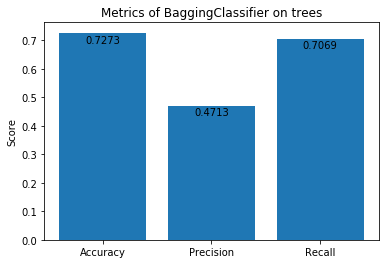

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Обучим BaggingClassifier
bagclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=10,
                          random_state=rnd_state)
bagclf.fit(X_train, y_train)

metrics(bagclf.predict(X_test), y_test, name='BaggingClassifier on trees')

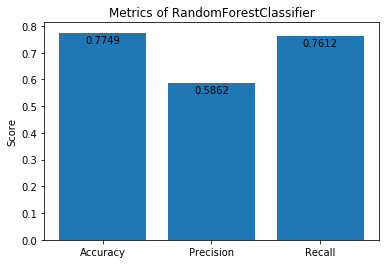

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Обучим RandomForestClassifier
ranforclf = RandomForestClassifier(n_estimators=10,
                                  random_state=rnd_state)
ranforclf.fit(X_train, y_train)

metrics(ranforclf.predict(X_test), y_test, 'RandomForestClassifier')

* Исходя из рассчитанных метрик, можно сделать вывод, что алгоритм RandomForestClassifier справился с задачей намного лучше, при $\text{n_estimators} = 10$. По всем параметрам он значительно обходит BaggingClassifier на деревьях. 

* Основным отличием данных алгоритмов является то, что модели в BaggingClassifier обучаются на независимых случайных выборках с возвращением, в то время как в случайном лесу рандомизации поддаются еще и признаки - каждое разбиение дерева делается на случайном подмножестве признаков размера $\sqrt{\text{n_features}}$. 
* Возможно, RandomForestClassifier обучился на более важных признаках, в результате чего получилось такое превосходство в  качестве метрик.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

Построим график линий уровня для ROC-AUC в зависимости от **n_estimators** и **min_samples_leaf**, чтобы понять где находятся оптимальные параметры модели.

In [ ]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

In [109]:
# Обучение
roc_auc = []

x, y = np.mgrid[10:1511:150,
                1:102:5]

for i, j in tqdm(zip(x, y)):
    roc_auc_i = []
    for min_samples_leaf in j:
        ranforclf = RandomForestClassifier(n_estimators=i[0],
                                           min_samples_leaf=min_samples_leaf,
                                           random_state=rnd_state)
        ranforclf.fit(X_train, y_train)
        roc_auc_i.append(roc_auc_score(ranforclf.predict(X_test), y_test))
    roc_auc.append(roc_auc_i)

11it [03:47, 20.68s/it]


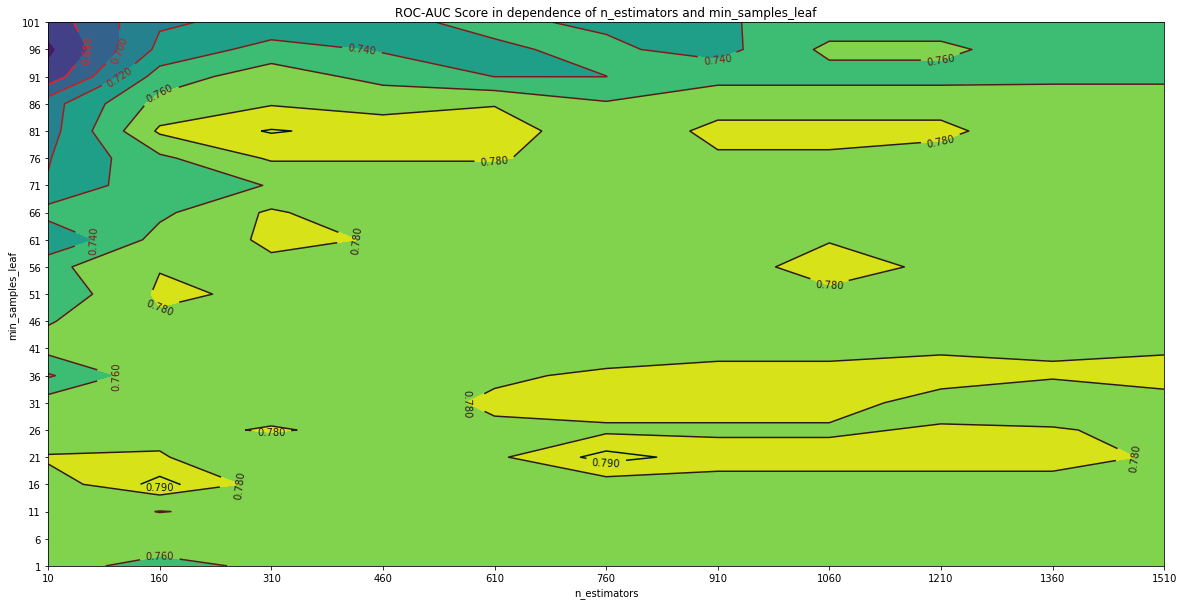

In [174]:
fig, ax = plt.subplots(figsize=(20,10))
# Заливка
ax.contourf(x, y, roc_auc)
# Цвета
color_line = np.zeros((7, 3))
color_line[:, 1:] = 0.1
color_line[:, 0] = np.linspace(1, 0, 7)
# Линии уровня
rect = ax.contour(x, y, roc_auc, colors = color_line, levels = [0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.79])
ax.clabel(rect)
# Тики и легенда
ax.set_xticks(range(10,1511,150))
ax.set_yticks(range(1,102,5))
ax.set_title('ROC-AUC Score in dependence of n_estimators and min_samples_leaf')
ax.set_xlabel('n_estimators')
ax.set_ylabel('min_samples_leaf')
plt.show()

In [153]:
print('Наибольшее значение ROC-AUC = %.4f' % np.max(roc_auc))
index = np.where(roc_auc == np.max(roc_auc))
print('Оптимальные параметры модели: n_estimators = %d, min_samples_leaf = %d' % (x[index], y[index]))

Наибольшее значение ROC-AUC = 0.7936
Оптимальные параметры модели: n_estimators = 760, min_samples_leaf = 21


Исходя из графика линий уровня ROC-AUC, можно заключить, что с увеличением числа деревьев, качество модели, как правило, увеличивается. Тем не менее, оптимальным количеством деревьев будет 760, хотя и при большем n_estimators качество модели уменьшается незначительно.

С минимальным количеством наблюдений в листе ситуация обратная. При слишком высоком значении этого параметра, деревья получаются чрезмерно простыми, отчего модель теряет в предсказательной способности и даже при большом количестве деревьев еле дотягивает до 0.76 по метрике ROC-AUC. Слишком низкое значение min_samples_leaf также вредит модели, деревья переобучаются. Оптимальным значением min_samples_leaf будет 21.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

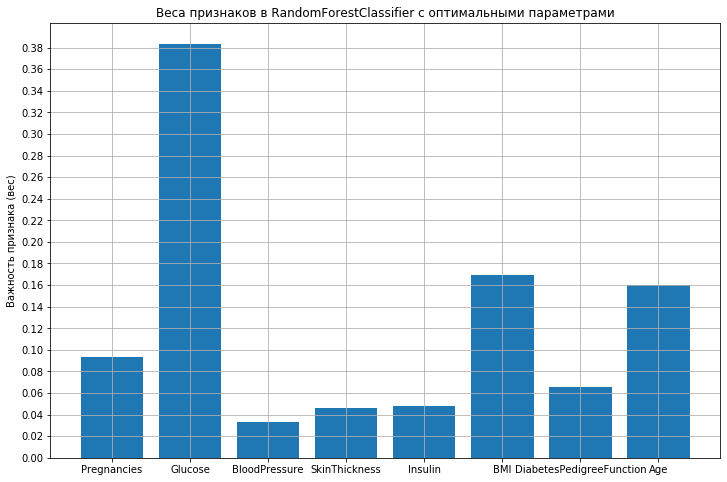

In [219]:
# Рассмотрим веса признаков в оптимальной модели
ranforclf = RandomForestClassifier(n_estimators=760,
                                   min_samples_leaf=21,
                                   random_state=rnd_state).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(X_train.columns, ranforclf.feature_importances_)
ax.set_title('Веса признаков в RandomForestClassifier с оптимальными параметрами')
ax.set_ylabel('Важность признака (вес)')
ax.set_xticks(X_train.columns)
ax.set_yticks(np.arange(0, 0.4, 0.02))
ax.grid(True)
plt.show()

Таким образом, для предсказания диабета наиболее важным признаком является уровень глюкозы в крови с весом около 38%. Кроме того, важны на 16,5% индекс массы тела и на 16% возраст для определения диабета. Каждый из остальных критериев вносит менее 10% в предсказание диабета.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [220]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

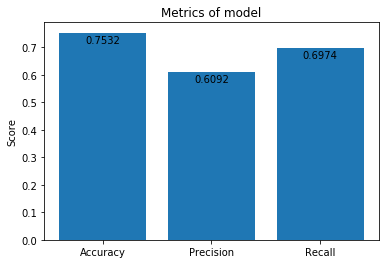

In [221]:
# HistGradientBoostingClassifier со значениями по умолчанию
histgbclf = HistGradientBoostingClassifier(random_state = rnd_state)
histgbclf.fit(X_train, y_train)
metrics(histgbclf.predict(X_test), y_test)

In [223]:
# Переберем параметры, чтобы найти оптимальные
grid_searcher = GridSearchCV(
    HistGradientBoostingClassifier(),
    scoring='roc_auc',
    param_grid={
        'max_leaf_nodes': [15, 31, 62, None], # Макс. кол-во биений
        'min_samples_leaf': [2, 8, 21, 50, 100], #  Мин. кол-во объектов в листе
        'max_iter': [10, 50, 100, 200, 500, 1000], # Кол-во деревьев
        'random_state': [rnd_state]},
    cv=4)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=HistGradientBoostingClassifier(),
             param_grid={'max_iter': [10, 50, 100, 200, 500, 1000],
                         'max_leaf_nodes': [15, 31, 62, None],
                         'min_samples_leaf': [2, 8, 21, 50, 100],
                         'random_state': [13]},
             scoring='roc_auc')

{'max_iter': 50, 'max_leaf_nodes': 15, 'min_samples_leaf': 50, 'random_state': 13}


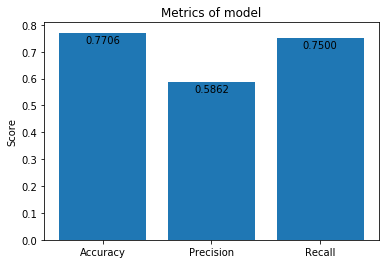

In [226]:
print(grid_searcher.best_params_) # Лучшие параметры
metrics(grid_searcher.predict(X_test), y_test)

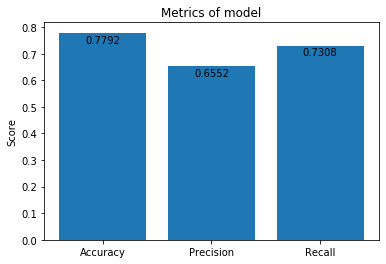

In [227]:
# GradientBoostingClassifier со значениями по умолчанию
gbclf = GradientBoostingClassifier(random_state = rnd_state)
gbclf.fit(X_train, y_train)
metrics(gbclf.predict(X_test), y_test)

In [228]:
# Перебор параметров для GradientBoostingClassifier
grid_searcher = GridSearchCV(
    GradientBoostingClassifier(),
    scoring='roc_auc',
    param_grid={
        'max_leaf_nodes': [15, 31, 62, None], # Макс. кол-во биений
        'min_samples_leaf': [1, 2, 8, 16, 21, 50, 100], #  Мин. кол-во объектов в листе
        'n_estimators': [10, 50, 100, 250, 500, 750, 1000], # Кол-во деревьев
        'random_state': [rnd_state]},
    cv=4)
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [15, 31, 62, None],
                         'min_samples_leaf': [1, 2, 8, 16, 21, 50, 100],
                         'n_estimators': [10, 50, 100, 250, 500, 750, 1000],
                         'random_state': [13]},
             scoring='roc_auc')

{'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 50, 'random_state': 13}


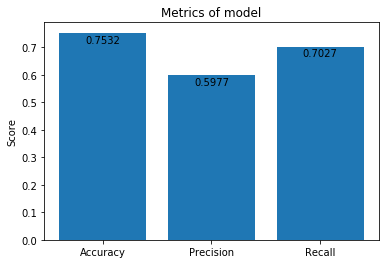

In [229]:
print(grid_searcher.best_params_) # Лучшие параметры
metrics(grid_searcher.predict(X_test), y_test)

Главное отличие модели HistGradientBoostingClassifier от GradientBoostingClassifier состоит в том, что HistGradientBoostingClassifier разбивает дерево не по всем объектам, а по их гистограмме, что позволяет добиться высокой скорости работы на больших датасетах (> 10 000 объектов).

Для HistGradientBoostingClassifier удалось улучшить accuracy и recall в то время, как precision упал. 

Удивительно, но для GradientBoostingClassifier все метрики ухудшились (видимо, из-за кросс-валидации).

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [200]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>

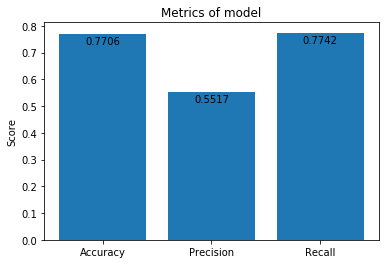

In [237]:
base_learners = [
    ('histgbclf', HistGradientBoostingClassifier(max_leaf_nodes=15, 
                                                 min_samples_leaf=50,
                                                 max_iter=50,
                                                 random_state=rnd_state)),
    ('gbclf', GradientBoostingClassifier(max_leaf_nodes=None, 
                                         min_samples_leaf=1,
                                         n_estimators=50,
                                         random_state=rnd_state)),
    ('ranforclf', RandomForestClassifier(n_estimators=760,
                                         min_samples_leaf=21,
                                         random_state = rnd_state))]

stckclf = StackingClassifier(estimators=base_learners,
                             final_estimator=LogisticRegression())
stckclf.fit(X_train, y_train)
metrics(stckclf.predict(X_test), y_test)

Взяв 3 наилучших модели для стэкинга, не удалось добиться хорошего качества. Ограниченность данного подхода заключается в том, что из моделей моделей среднего качества не получиться сделать более хорошую. Precision равный 0.55 остается неудовлетворительным показателям, хотя высокий recall, наоборот, хорош для предсказания диабета. Возможно, некоторые из предыдущих классификаторов в одиночку справяться лучше, чем данный мета-классификатор.